In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
Y_train = train["label"]
print(Y_train.shape)

X_train = train.drop(labels = ["label"],axis = 1) 
print(X_train.shape)
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = pd.read_csv("./Do_not_submit.csv")

(42000,)
(42000, 784)


In [4]:
def gen_model():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    #model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))

    #model.summary()
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [5]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)

In [7]:
res={}
for batch in range(64,130,2):
    res[batch]={}

In [8]:
for batch in range(64,130,2):
    for val in [0.1,0.2,0.3,0.4]:
        print(datetime.now().time())
        print('batch = {}, validation_split = {}'.format(batch,val))
        model = gen_model()
        history = model.fit(X_train,Y_train, batch_size=batch,
                    epochs = 100, validation_split = val,verbose = 0, callbacks=[es])
        pred = np.argmax(model.predict(test), axis=1)
        acc_rate=sum(pred==np.array(Y_test['Label']))/28000
        plt.plot(history.history['accuracy'], label='train')
        plt.plot(history.history['val_accuracy'], label='test')
        plt.title('Plot History: Model Accuracy {} {}'.format(batch,val))
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        #plt.show()
        plt.savefig('{}_{}_acc.jpg'.format(batch,val))
        plt.clf()

        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='test loss')
        plt.title('Plot History: Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='upper left')
        #plt.show()
        plt.savefig('{}_{}_loss.jpg'.format(batch,val))
        plt.clf()
        #pred_testy=model.predict(test,verbose=1)
        
        print('batch = {}, validation_split = {}, acc_rate = {}'.format(batch,val,acc_rate))
        res[batch][val]=acc_rate

15:58:44.131799
batch = 64, validation_split = 0.1
Epoch 00019: early stopping
batch = 64, validation_split = 0.1, acc_rate = 0.9913214285714286
15:59:52.645414
batch = 64, validation_split = 0.2
Epoch 00026: early stopping
batch = 64, validation_split = 0.2, acc_rate = 0.992
16:01:12.650808
batch = 64, validation_split = 0.3
Epoch 00021: early stopping
batch = 64, validation_split = 0.3, acc_rate = 0.9897142857142858
16:02:19.339520
batch = 64, validation_split = 0.4
Epoch 00021: early stopping
batch = 64, validation_split = 0.4, acc_rate = 0.9917142857142857
16:03:21.066891
batch = 66, validation_split = 0.1
Epoch 00023: early stopping
batch = 66, validation_split = 0.1, acc_rate = 0.99225
16:04:42.978649
batch = 66, validation_split = 0.2
Epoch 00022: early stopping
batch = 66, validation_split = 0.2, acc_rate = 0.9920714285714286
16:05:56.183942
batch = 66, validation_split = 0.3
Epoch 00019: early stopping
batch = 66, validation_split = 0.3, acc_rate = 0.9908571428571429
16:06:56.

<Figure size 432x288 with 0 Axes>

In [9]:
res

{64: {0.1: 0.9913214285714286,
  0.2: 0.992,
  0.3: 0.9897142857142858,
  0.4: 0.9917142857142857},
 66: {0.1: 0.99225,
  0.2: 0.9920714285714286,
  0.3: 0.9908571428571429,
  0.4: 0.9914642857142857},
 68: {0.1: 0.9903571428571428,
  0.2: 0.9924285714285714,
  0.3: 0.9908214285714285,
  0.4: 0.9913571428571428},
 70: {0.1: 0.9925714285714285,
  0.2: 0.9922142857142857,
  0.3: 0.99275,
  0.4: 0.9915357142857143},
 72: {0.1: 0.9914642857142857,
  0.2: 0.9921785714285715,
  0.3: 0.9910714285714286,
  0.4: 0.9897142857142858},
 74: {0.1: 0.9932857142857143,
  0.2: 0.9923928571428572,
  0.3: 0.99225,
  0.4: 0.992},
 76: {0.1: 0.9923214285714286,
  0.2: 0.9928571428571429,
  0.3: 0.9910714285714286,
  0.4: 0.9905714285714285},
 78: {0.1: 0.9930714285714286,
  0.2: 0.9918928571428571,
  0.3: 0.9917142857142857,
  0.4: 0.9923571428571428},
 80: {0.1: 0.9926071428571429,
  0.2: 0.9907142857142858,
  0.3: 0.9886428571428572,
  0.4: 0.9913571428571428},
 82: {0.1: 0.9926071428571429,
  0.2: 0.99

In [65]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

In [66]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [70]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [71]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [75]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [73]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=64),
                              epochs = 30, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // 64
                              , callbacks=[learning_rate_reduction])

In [178]:
model = gen_model()

In [179]:
history = model.fit(X_train,Y_train, batch_size=112,
                    epochs = 100, validation_split = 0.1,verbose = 0,callbacks=[es])

Epoch 00024: early stopping


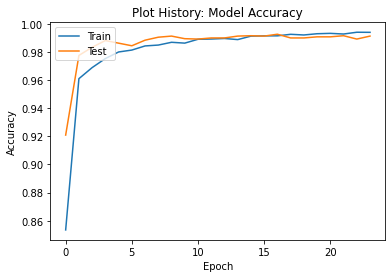

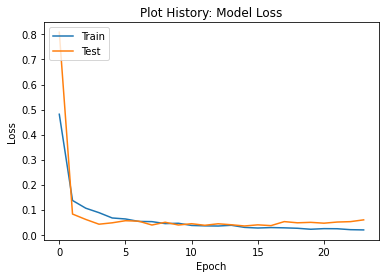

<Figure size 432x288 with 0 Axes>

In [181]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.clf()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('test.jpg')

In [182]:
pred_testy=model.predict(test)

In [183]:
pred = np.argmax(pred_testy, axis=1)

In [184]:
sum(pred==np.array(Y_test['Label']))/28000

0.9923571428571428

In [177]:
res

{64: {0.1: 0.9914285714285714,
  0.2: 0.9918571428571429,
  0.3: 0.9911428571428571,
  0.4: 0.9920357142857142},
 68: {0.1: 0.99,
  0.2: 0.9922142857142857,
  0.3: 0.9910357142857142,
  0.4: 0.9838214285714286},
 72: {0.1: 0.9906428571428572,
  0.2: 0.9920714285714286,
  0.3: 0.9903928571428572,
  0.4: 0.989},
 76: {0.1: 0.9925,
  0.2: 0.9909642857142857,
  0.3: 0.9910714285714286,
  0.4: 0.9917142857142857},
 80: {0.1: 0.9906428571428572,
  0.2: 0.9908214285714285,
  0.3: 0.9915357142857143,
  0.4: 0.9927142857142857},
 84: {0.1: 0.9913214285714286,
  0.2: 0.9926071428571429,
  0.3: 0.9915,
  0.4: 0.9886785714285714},
 88: {0.1: 0.9912142857142857,
  0.2: 0.9916785714285714,
  0.3: 0.9925,
  0.4: 0.9898928571428571},
 92: {0.1: 0.9911071428571429,
  0.2: 0.9911071428571429,
  0.3: 0.9911071428571429,
  0.4: 0.9881428571428571},
 96: {0.1: 0.99225,
  0.2: 0.9907857142857143,
  0.3: 0.9918928571428571,
  0.4: 0.9903571428571428},
 100: {0.1: 0.9916071428571429,
  0.2: 0.9915357142857143